# The Third Task is to predict optimum number of clusters

Data Link:https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [1]:
## Importing the requried libraries
import numpy as np
import pandas as pd

In [2]:
##Importing the data
data=pd.read_csv("C:\\Users\\chanakya balemarthy\\Pictures\\DATASETS\\Iris.csv")

In [3]:
## checking the data with first 3 records
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
## checking number of rows and number of columns
data.shape

(150, 6)

In [5]:
## checking the type of each feature
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
##summary of the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
##checking whether there is any null values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
##Exploring the target variable(categoricaltype)
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

## Data Vizualization

In [9]:
## importing the libraries required for plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

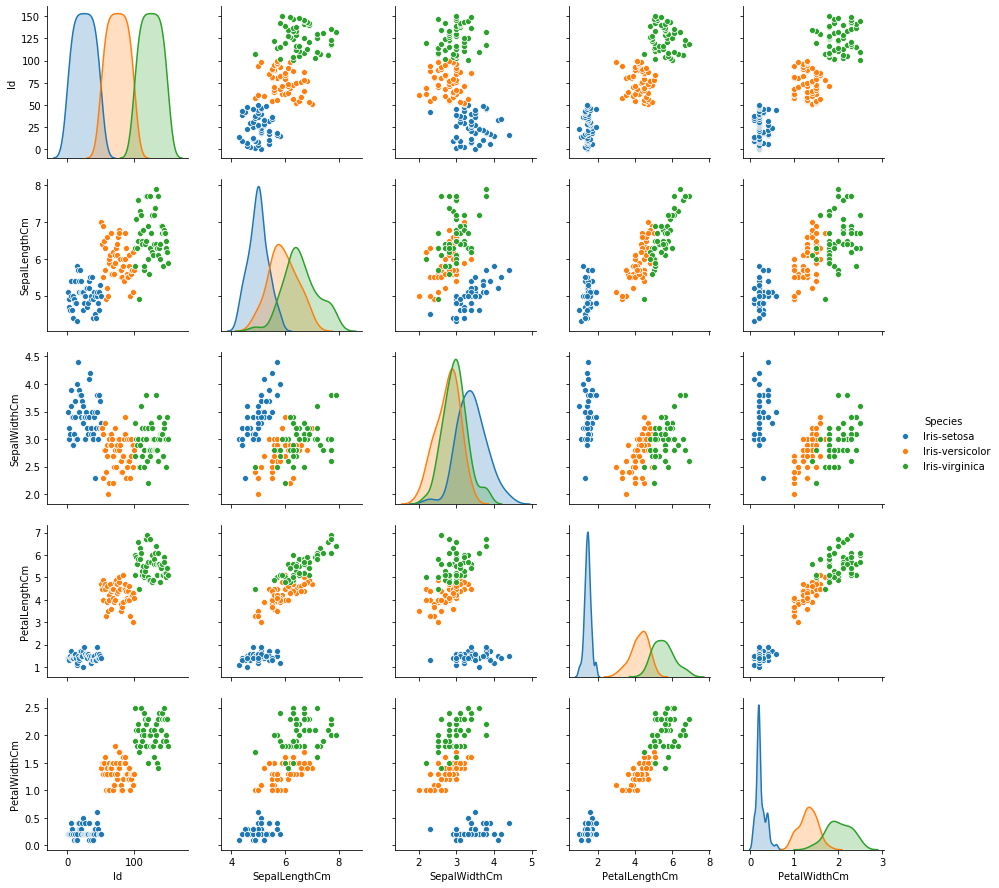

In [10]:
sns.pairplot(data,hue='Species')

## Data Preparation

In [11]:
## removing unwanted columns
data.drop('Id',axis=1,inplace=True)

#### The values of all features must be in same scale mainly for the algorithms that uses distance measure as a metric. In this datasset the all features are in same scale.so, no need of FEATURE SCALING.

In [12]:
## import the library used for splitting x & y into train and test
from sklearn.model_selection import train_test_split

In [13]:
x = data.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

In [14]:
for i in range(1,11):
    k_means= KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

#### PLOTTING THE RESULTS

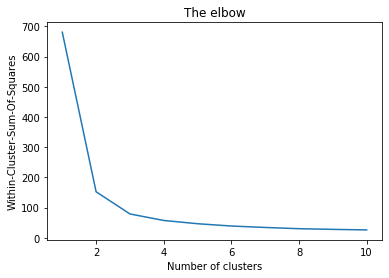

In [15]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-Of-Squares')
plt.show()

There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. 

As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

### Kmeans classifier

In [16]:
k_means = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_k_means = k_means.fit_predict(x)

### Plotting the clusters

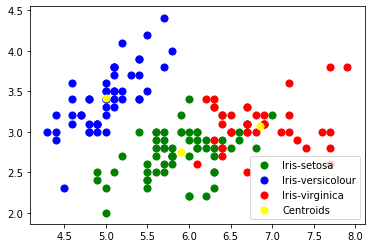

In [17]:
plt.scatter(x[y_k_means == 0, 0], x[y_k_means == 0, 1], 
            s = 50, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_k_means == 1, 0], x[y_k_means == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_k_means == 2, 0], x[y_k_means == 2, 1],
            s = 50, c = 'red', label = 'Iris-virginica')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()